In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Mldatasets\\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.shape

(768, 9)

In [8]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df.iloc[:,:-1].values

In [12]:
y= df['Outcome']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [16]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred= knn.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [21]:
acc = accuracy_score(y_test, y_pred)
acc

0.6948051948051948

In [22]:
re = recall_score(y_test, y_pred)
re

0.509090909090909

In [23]:
er = 1 - acc
er

0.30519480519480524

In [24]:
pr = precision_score(y_test, y_pred)
pr


0.5833333333333334

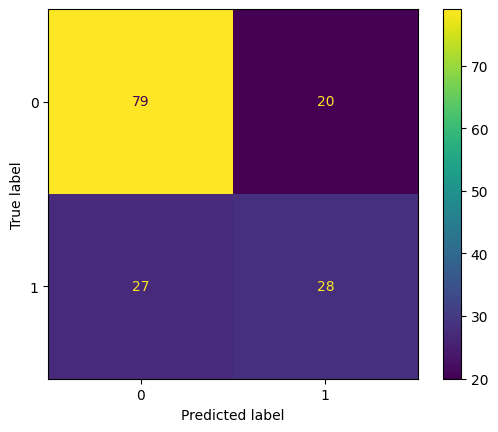

In [26]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
cm.plot()